## This code demonstrate the workflow of mercary price suggestion challenge. This is an detailed Exploratory Data Analysis

---



---



The First step is basically setting up the data for our analysis. We show in detail demostration in the first step.

Step 1: Setting up the colab environment

In [0]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

In [230]:
# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [0]:
#before importing the dataset we want to use this code
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [232]:
!kaggle competitions download -c mercari-price-suggestion-challenge

sample_submission_stg2.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
 98% 73.0M/74.3M [00:00<00:00, 93.7MB/s]
100% 74.3M/74.3M [00:00<00:00, 151MB/s] 
test_stg2.tsv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.tsv.7z: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.7z: Skipping, found more recently modified local copy (use --force to force download)


In [233]:
# We unzip the downloaded .7z file
!apt-get install p7zip-full
!p7zip -d train.tsv.7z


Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.

7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 77912192 bytes (75 MiB)

Extracting archive: train.tsv.7z
--
Path = train.tsv.7z
Type = 7z
Physical Size = 77912192
Headers Size = 122
Method = LZMA2:24
Solid = -
Blocks = 1

  0%    
Would you like to replace the existing file:
  Path:     ./train.tsv
  Size:     337809843 bytes (323 MiB)
  Modified: 2017-11-11 01:31:09
with the file from archive:
  Path:     train.tsv
  Size:     337809843 bytes (323 MiB)
  Modified: 2017-11-11 01:31:09
? (Y)es / (N)o / (A)lways / (S)kip all / A(u)to renam

**Step 2: Exploratory Analysis on the train data**

In [305]:
import pandas as pd
df_price = pd.read_csv('train.tsv', sep = '\t')
df_price.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [306]:
#Let's walk towards the details of this dataframe.
print("shape of this dataframe : " + str(df_price.shape))
df_price.info()

shape of this dataframe : (1482535, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


We got some hint. We have some missing value in category_name and item_description. Most importantly **A lot of entries DONOT have a brand name**. Why this is so and does it have a meaning rather than just a missing data? We will deal with this later. 

In [307]:
df_price.describe()

,train_id,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06
mean,7.412670e+05,1.907380e+00,2.673752e+01,4.472744e-01
std,4.279711e+05,9.031586e-01,3.858607e+01,4.972124e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.706335e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,7.412670e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111900e+06,3.000000e+00,2.900000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00


In [308]:
df_price.describe(include=object)

,name,category_name,brand_name,item_description
count,1482535,1476208,849853,1482531
unique,1225273,1287,4809,1281426
top,Bundle,"Women/Athletic Apparel/Pants, Tights, Leggings",PINK,No description yet
freq,2232,60177,54088,82489


Let's review more hints and observations. 
1. Train_id doesn't mean anything.
2. Item Condition id has 1,2,3,4, and 5 rating, where 1 means is almost new and 5 means the opposite.
3. There are some stuffs with zero price, which is quite strange. We have to deal with that.
4. Shipping has binart 0 or 1 value. 1 is shipping value paid by the seller.
5. In item description, we have some lazy customer or someone who is just reluctant to provide any description. Why is that? 

In [309]:
# Now we will do some cleaning of the data. First, we will check for None values.
df_price.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

We can clearly see that, category_name, brand_name and item_description has missing values. We can use the fillna method to fill the missing values. 

In [0]:
df_price['category_name'].fillna(value='Other', inplace=True) 
# There's category name called "Other", and the missing categories can be entitled to that
df_price['brand_name'].fillna(value='Non-branded', inplace=True)
df_price['item_description'].fillna(value='No description provided', inplace=True)

We saw earlier that some entries have stated price as zero (0). Now, this is an unexpected situation as when Mercury would want to suggest a seller some price, it is no-way can be zero. Also, the price is our predictive variable and we donot want to mess with it by extrapolating it somehow. Thus, let's just remove that. 

In [311]:
df_price = df_price[df_price.price!=0]
df_price.shape

(1481661, 8)

**Step 2: Visualization of distribution**

We will start with exploring of the price. We will see how the price is distributed.

In [312]:
df_price['price'].describe()

count    1.481661e+06
mean     2.675329e+01
std      3.859198e+01
min      3.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

Text(0, 0.5, 'Number of entries in the range')

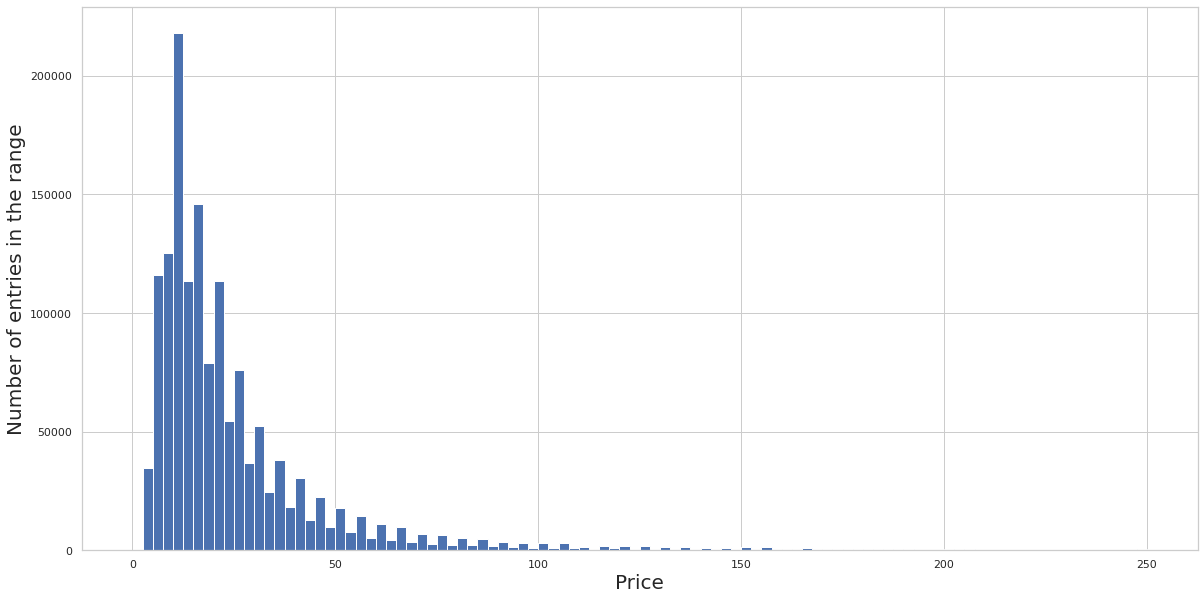

In [313]:
#Let's visualize
import matplotlib.pyplot as plt
%matplotlib inline
df_price['price'].hist(bins=100, figsize=(20, 10), edgecolor = 'white', range = [0, 250]) #edgecolor ensures in-between bins, we have something different color as seperator
plt.xlabel('Price', fontsize=20)
plt.ylabel('Number of entries in the range', fontsize=20)

The price distribution is highly skewed to right side. That means, most products are priced between 0 to 50 usd and may be some in the hundreds.

In [314]:
print('prices less than or equal to 50 USD are {:.2f}%  and prices less than 100 USD are {:.2f}% of the total data.'.format(df_price[df_price.price<=50].shape[0]*100/df_price.shape[0],
      df_price[df_price.price<=100].shape[0]*100/df_price.shape[0]))

prices less than or equal to 50 USD are 89.89%  and prices less than 100 USD are 97.17% of the total data.


Due to the skewed distribution of the price, in Kaggle, the measure of error is RMSLE (Root Mean-Squared Log Error). So, we will transform the data into log scale.

**Now, we will try to analyze the shipping**

In [315]:
df_price['shipping'].value_counts()*100/len(df_price)

0    55.267433
1    44.732567
Name: shipping, dtype: float64

So, in 55% of the cases shipping cost will not be provided by the seller and the buyer has to pay for it. 

But is there anything we can relate with shipping and price?

In [316]:
df_price.price.groupby(df_price.shipping).mean()

shipping
0    30.132333
1    22.578452
Name: price, dtype: float64

This is interesting but slight contraty to intuitive thought. Products where shipping cost is paid by the seller is lower in average price. However, there can be reasons behind it, and further analysis can be done to explore the fact.

**Now we will try to analyze the effect of item condition on price**

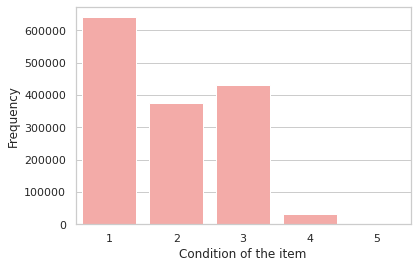

In [317]:
import seaborn as sns

conditions = df_price.item_condition_id.value_counts().reset_index()

sns.barplot(x="index", y='item_condition_id', data=conditions, color="r")

plt.xlabel('Condition of the item')
plt.ylabel('Frequency')
plt.show()


So, we can see that, most items are in very good condition. Let's find out how the avergae price is distributed along different conditioned items.

In [318]:
df_price['price'].groupby(df_price.item_condition_id).mean()

item_condition_id
1    26.499502
2    27.584015
3    26.557241
4    24.362169
5    31.730479
Name: price, dtype: float64

The mean price doesnot seem to be much informative.

**We have a column named category. Can we find something meaningful from the category name?**

In [319]:
df_price['category_name'].describe(include=object)

count                                            1481661
unique                                              1288
top       Women/Athletic Apparel/Pants, Tights, Leggings
freq                                               60152
Name: category_name, dtype: object

We have 1288 unique categories here. It's difficult to visualize all of them. Let's try to visualize top 20 of them. 

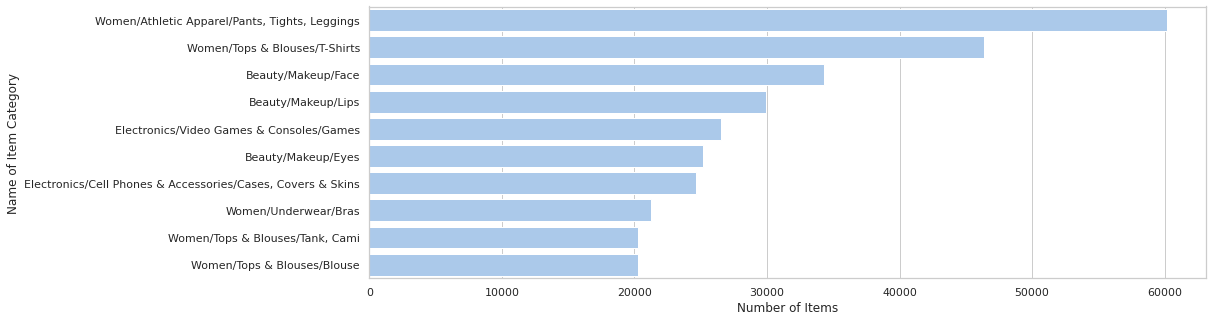

In [320]:
cats = df_price.category_name.value_counts().reset_index()[:10]
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 5))

# Plot the total items per category
sns.barplot(x="category_name", y='index', data=cats, color="b")
# Add a legend and informative axis label
ax.set( ylabel="Name of Item Category",
       xlabel="Number of Items")

plt.show()

We get a hint that most of the items belong to women products. We have to find a way to categorize that in a better way. One way can be analyze the subcategories that are seperated by backslash. 

In [0]:
# Creating new Category Features
def seperate_categories(category_name):
  # We observe that most entries have three category names seperated by a backslash. 
  # If we do not find such, we will return the miscellaneous category.
    try:
        main_cat, sub_cat1, sub_cat2= category_name.split('/')
        return main_cat, sub_cat1, sub_cat2
    except:
        return 'Other','Other','Other'

In [322]:
df_price['category_main'], df_price['category_sub1'], df_price['category_sub2'] = zip(*df_price['category_name'].apply(seperate_categories))
categories = df_price[['category_main','category_sub1','category_sub2', 'price']]
categories.head(7)

,category_main,category_sub1,category_sub2,price
0,Men,Tops,T-shirts,10.0
1,Electronics,Computers & Tablets,Components & Parts,52.0
2,Women,Tops & Blouses,Blouse,10.0
3,Home,Home Décor,Home Décor Accents,35.0
4,Women,Jewelry,Necklaces,44.0
5,Women,Other,Other,59.0
6,Women,Swimwear,Two-Piece,64.0


In [323]:
cat_dist = categories.category_main.value_counts()
print(cat_dist)

Women                     663990
Beauty                    207725
Kids                      171555
Electronics               119577
Men                        93292
Home                       67831
Other                      56028
Vintage & Collectibles     46519
Handmade                   30833
Sports & Outdoors          24311
Name: category_main, dtype: int64


In [332]:
cat_dist.index

Index(['Women', 'Beauty', 'Kids', 'Electronics', 'Men', 'Home', 'Other',
       'Vintage & Collectibles', 'Handmade', 'Sports & Outdoors'],
      dtype='object')

In [333]:
print('{} category is top and {:.2f}% of total entries and {} category is the least frequent and {:.2f}% of total entries'.
      format(cat_dist.index[0], cat_dist[0]*100/df_price.shape[0], cat_dist.index[-1], cat_dist[-1]*100/df_price.shape[0]))

Women category is top and 44.81% of total entries and Sports & Outdoors category is the least frequent and 1.64% of total entries


Now, we can explore how many sub-categories are present of each category.

In [325]:
c = pd.crosstab(categories['category_sub1'], categories['category_main'])
c.head()

category_main,Beauty,Electronics,Handmade,Home,Kids,Men,Other,Sports & Outdoors,Vintage & Collectibles,Women
category_sub1,,,,,,,,,,
Accessories,0,0,5954,0,0,0,0,0,2258,0
Antique,0,0,0,0,0,0,0,0,6093,0
Apparel,0,0,0,0,0,0,0,2918,0,0
Art,0,0,655,0,0,0,0,0,0,0
Artwork,0,0,0,1263,0,0,0,0,0,0


This table can be a bit hard to visulaize. Instead, we can plot if we want.

In [0]:
main_cat = {}
for col in c.columns:
  col_value = c[col].tolist()
  main_cat[col] = [(c.index[idx], itm) for idx, itm in enumerate(col_value) if itm>0]


The main_cat function is a dictionary, where for each key, we have main item and then tuples of sub category 1 and the count of them. The same can be done for sub category 2 as well.

In [327]:
main_cat['Home']

[('Artwork', 1263),
 ('Bath', 1192),
 ('Bedding', 4226),
 ('Cleaning Supplies', 2366),
 ('Furniture', 165),
 ('Home Appliances', 2586),
 ('Home Décor', 25170),
 ("Kids' Home Store", 674),
 ('Kitchen & Dining', 21947),
 ('Other', 502),
 ('Seasonal Décor', 4863),
 ('Storage & Organization', 2877)]

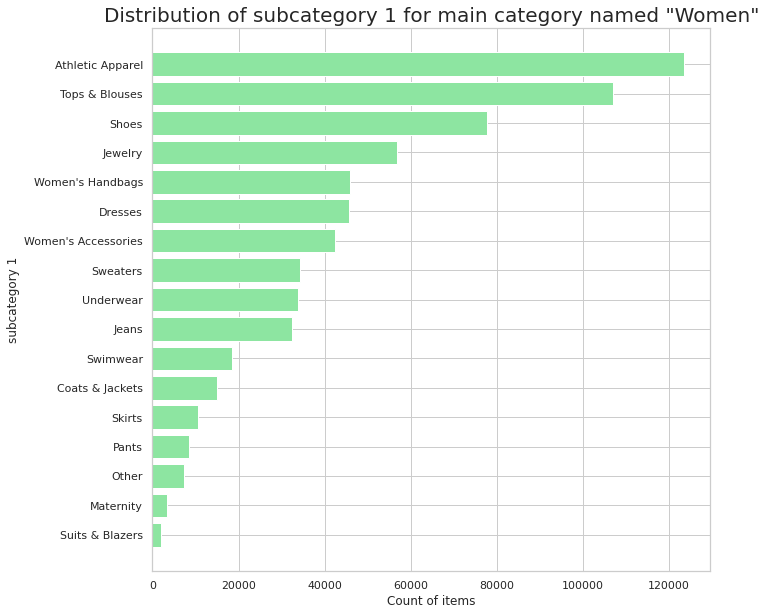

In [328]:
# We plot the distribution for the women category
plt.figure(figsize=(10,10))
women_category = sorted(main_cat['Women'], key=lambda x:x[1])
plt.barh(list(zip(*women_category))[0], list(zip(*women_category))[1], color='g')
plt.xlabel('Count of items')
plt.ylabel('subcategory 1')
plt.title('Distribution of subcategory 1 for main category named "Women"', fontsize=20)
plt.show()

We can create many of the such visualization based on our target problem.

**Next we will focus on the brands**

In [329]:
# How many brands are present there?
print(df_price['brand_name'].describe())

count         1481661
unique           4808
top       Non-branded
freq           632336
Name: brand_name, dtype: object


So, there are 4808 unique brands. Interestingly, the top catgeory is Non-branded. Therefore, we can choose the products with brand only. We can check in more detail

In [330]:
df_price['brand_name'].value_counts()[1:20]*100/df_price[df_price.brand_name!='Non-branded'].shape[0]

PINK                 6.366467
Nike                 6.358697
Victoria's Secret    5.652842
LuLaRoe              3.649369
Apple                2.038560
FOREVER 21           1.787066
Nintendo             1.765873
Lululemon            1.713125
Michael Kors         1.638478
American Eagle       1.559474
Rae Dunn             1.448209
Sephora              1.432196
Coach                1.231331
Disney               1.218850
Bath & Body Works    1.218615
Adidas               1.200365
Funko                1.087099
Under Armour         0.995850
Sony                 0.940983
Name: brand_name, dtype: float64

**What are the most expensive brands**

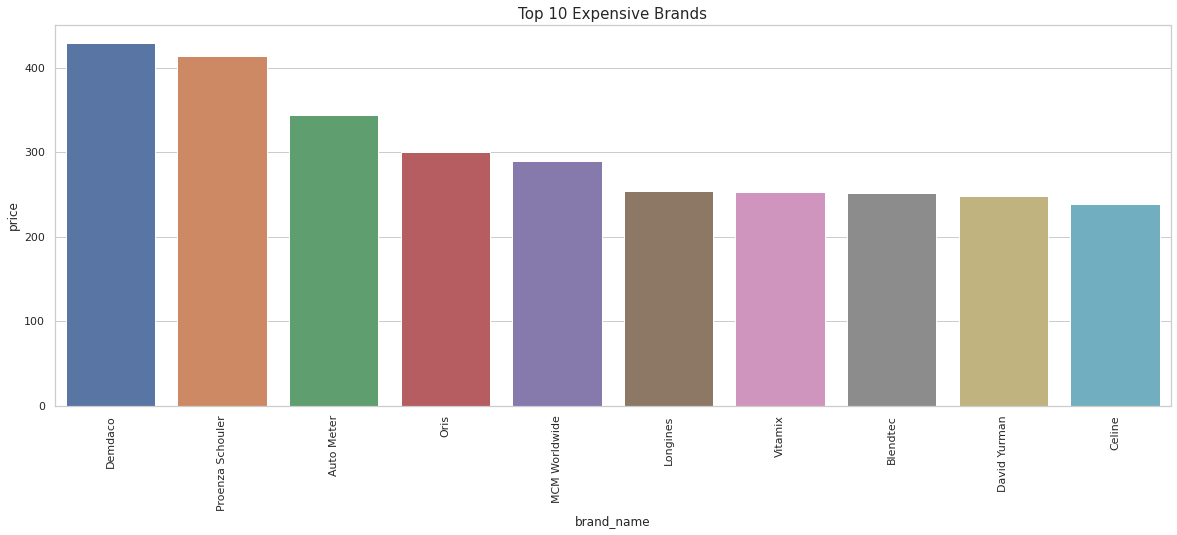

In [331]:
top_expensive_brands = pd.DataFrame(df_price.groupby(['brand_name'],as_index=True).mean().price.sort_values(ascending=False)[0:10]).reset_index()
plt.figure(figsize=(20, 7))
ax = sns.barplot(x="brand_name", y="price", data=top_expensive_brands)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Top 10 Expensive Brands', fontsize=15)
plt.show()
